In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

In [2]:
# Cleaned Dataset
columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv("processed.cleveland.data",
                 names=columns, na_values="?")

df = df.dropna()

# Convert target to binary (0 = no disease, 1 = disease)
y = (df["target"] > 0).astype(int)
X = df.drop("target", axis=1)

In [3]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (237, 13)
Test set shape: (60, 13)


In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

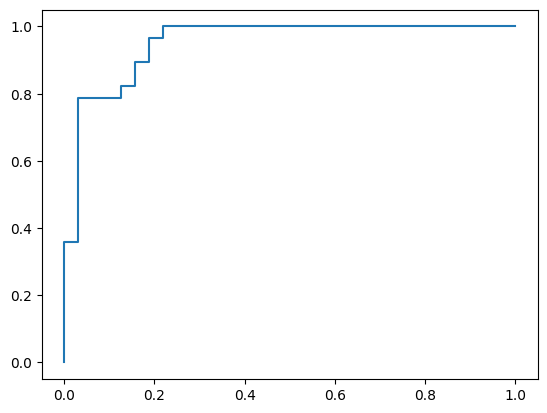

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]
results = {}

# Metrics
results["Logistic Regression"] = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_prob)
}

# ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC={results['Logistic Regression']['AUC']:.2f})")


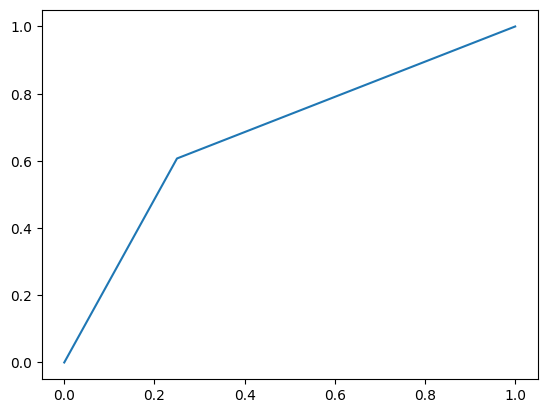

In [8]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

results["Decision Tree"] = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_prob)
}

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"Decision Tree (AUC={results['Decision Tree']['AUC']:.2f})")


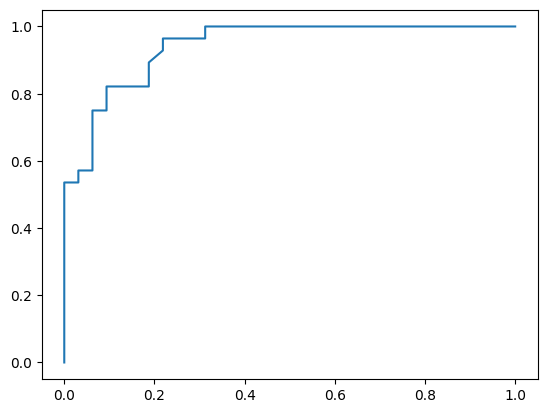

In [9]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

results["Random Forest"] = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_prob)
}

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"Random Forest (AUC={results['Random Forest']['AUC']:.2f})")


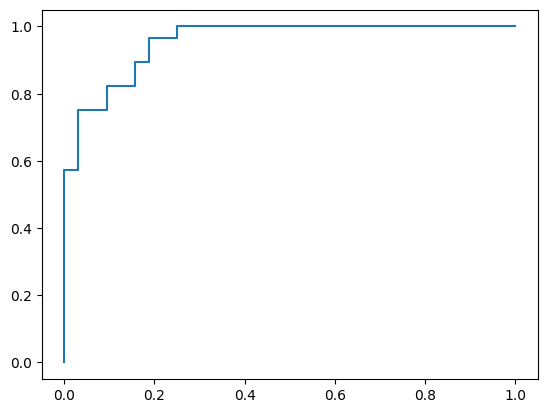

In [10]:
model = SVC(probability=True, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

results["SVM"] = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred),
    "AUC": roc_auc_score(y_test, y_prob)
}

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"SVM (AUC={results['SVM']['AUC']:.2f})")


/tmp/ipython-input-2904528478.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


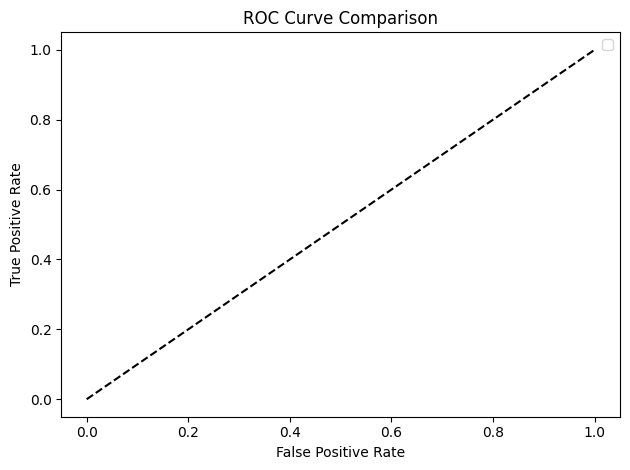


Model Performance:
                     Accuracy  Precision    Recall  F1-score       AUC
Logistic Regression  0.833333   0.846154  0.785714  0.814815  0.949777
Decision Tree        0.683333   0.680000  0.607143  0.641509  0.678571
Random Forest        0.866667   0.884615  0.821429  0.851852  0.941406
SVM                  0.850000   0.880000  0.785714  0.830189  0.954241


In [11]:
# ROC Curves
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.tight_layout()
plt.savefig("roc_curves.png")
plt.show()

# Results Table
results_df = pd.DataFrame(results).T  # transpose so models are rows
print("\nModel Performance:")
print(results_df)
